<a href="https://colab.research.google.com/github/sripadhirakshith01-hash/Deep_Learning_with_Tensorflow/blob/main/Fashion_style_predictor_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fashion style predictor
In this we are going to build a model by using `Fashion Product Images` dataset  
In this dataset we have `35594` training images and `8825` test image

## Importing our dataset from the Kaggle
URL :- https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paramaggarwal/fashion-product-images-small")

print("Path to dataset files:", path)

100%|██████████| 565M/565M [00:26<00:00, 22.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-small/versions/1


In [ ]:
# import os
# for dirpath, dirname, filename in os.walk("/root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-small/versions/1"):
#   print(f"There are {len(filename)} images in the {dirname} in this path {dirpath}")


In [ ]:
import os
for dirpath, dirname, filename in os.walk("/root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-small/versions/1/images"):
  print(f"There are {len(filename)} images in the {dirname} in this path {dirpath}")


There are 44441 images in the [] in this path /root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-small/versions/1/images


In [ ]:
!ls /root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-small/versions/1

images	myntradataset  styles.csv


In [ ]:
import pandas as pd
styles_df = pd.read_csv("/root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-small/versions/1/styles.csv", on_bad_lines='skip')
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [ ]:
data = styles_df[["id","articleType"]]
data.head()

,id,articleType
0,15970,Shirts
1,39386,Jeans
2,59263,Watches
3,21379,Track Pants
4,53759,Tshirts


In [ ]:
labels = data["articleType"].unique()

## Spliting the dataset into train and test folders

In [ ]:
import shutil
import os
for class_name in labels:
  os.makedirs("data/" + class_name, exist_ok=True)
  images_moved=[]
  for row in data.itertuples():
    label = row.articleType
    id = row.id
    if(class_name == label):
      og_path = "/root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-small/versions/1/images/" + str(id) + ".jpg"
      new_path = "data/" + class_name + "/" + str(id) + ".jpg"
      if os.path.exists(og_path):
        shutil.copy2(og_path, new_path)
        images_moved.append(new_path)
      else:
        print(f"Warning: Image {id}.jpg not found at {og_path}. Skipping.")
  print(f"copied {len(images_moved)} images for class '{class_name}'")

copied 3215 images for class 'Shirts'
copied 608 images for class 'Jeans'
copied 2542 images for class 'Watches'
copied 304 images for class 'Track Pants'
copied 7066 images for class 'Tshirts'
copied 686 images for class 'Socks'
copied 2845 images for class 'Casual Shoes'
copied 813 images for class 'Belts'
copied 914 images for class 'Flip Flops'
copied 1759 images for class 'Handbags'
copied 1762 images for class 'Tops'
copied 477 images for class 'Bra'
copied 897 images for class 'Sandals'
copied 23 images for class 'Shoe Accessories'
copied 285 images for class 'Sweatshirts'
copied 347 images for class 'Deodorant'
copied 637 images for class 'Formal Shoes'
copied 66 images for class 'Bracelet'
copied 315 images for class 'Lipstick'
copied 500 images for class 'Flats'
copied 1844 images for class 'Kurtas'
copied 15 images for class 'Waistcoat'
copied 2036 images for class 'Sports Shoes'
copied 547 images for class 'Shorts'
copied 849 images for class 'Briefs'
copied 427 images for 

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def view_random_img(target_folder, target_class):
  target_dir = target_folder + target_class
  random_img = random.sample(os.listdir(target_dir), 1)
  img = mpimg.imread(target_dir + "/" + random_img[0]) # Fix: Access the element from the list
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

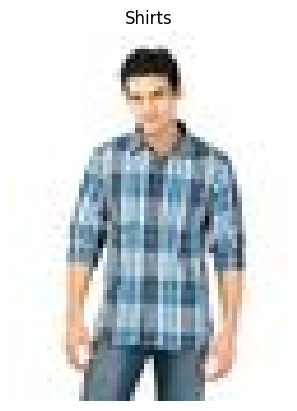

In [ ]:
view_random_img(target_folder="/content/data/",target_class="Shirts")

In [ ]:
import os
import shutil
import random

source_root = "/content/data"     # Your main folder containing 143 class folders
train_root = "/content/train_data"
test_root = "/content/test_data"

# Create train & test root directories
os.makedirs(train_root, exist_ok=True)
os.makedirs(test_root, exist_ok=True)

test_ratio = 0.2   # 20% test, 80% train

# Loop through each class folder
for class_name in os.listdir(source_root):
    class_path = os.path.join(source_root, class_name)

    # Ensure it's a directory
    if os.path.isdir(class_path):

        # Create class subfolders in train & test
        train_class_dir = os.path.join(train_root, class_name)
        test_class_dir = os.path.join(test_root, class_name)

        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)

        # List all image files
        files = os.listdir(class_path)
        files = [f for f in files if f.lower().endswith(('.jpg','.jpeg','.png','.bmp','.webp'))]

        # Shuffle & split
        random.shuffle(files)
        test_size = int(len(files) * test_ratio)

        test_files = files[:test_size]
        train_files = files[test_size:]

        # Copy test files
        for file in test_files:
            shutil.copy(
                os.path.join(class_path, file),
                os.path.join(test_class_dir, file)
            )

        # Copy train files
        for file in train_files:
            shutil.copy(
                os.path.join(class_path, file),
                os.path.join(train_class_dir, file)
            )

        print(f"Class: {class_name} → Train: {len(train_files)}, Test: {len(test_files)}")


Class: Watches → Train: 2034, Test: 508
Class: Tablet Sleeve → Train: 3, Test: 0
Class: Salwar and Dupatta → Train: 6, Test: 1
Class: Nail Polish → Train: 264, Test: 65
Class: Flats → Train: 400, Test: 100
Class: Swimwear → Train: 14, Test: 3
Class: Capris → Train: 140, Test: 35
Class: Wristbands → Train: 6, Test: 1
Class: Mask and Peel → Train: 10, Test: 2
Class: Shoe Laces → Train: 1, Test: 0
Class: Sports Sandals → Train: 54, Test: 13
Class: Fragrance Gift Set → Train: 46, Test: 11
Class: Waist Pouch → Train: 14, Test: 3
Class: Bra → Train: 382, Test: 95
Class: Mufflers → Train: 31, Test: 7
Class: Face Serum and Gel → Train: 2, Test: 0
Class: Accessory Gift Set → Train: 78, Test: 19
Class: Trousers → Train: 424, Test: 106
Class: Travel Accessory → Train: 13, Test: 3
Class: Laptop Bag → Train: 66, Test: 16
Class: Tshirts → Train: 5653, Test: 1413
Class: Foundation and Primer → Train: 61, Test: 15
Class: Umbrellas → Train: 5, Test: 1
Class: Ipad → Train: 1, Test: 0
Class: Shoe Accesso

In [ ]:
import os
for dirpath, dirname, filename in os.walk("/content/train_data"):
  print(f"There are {len(filename)} images in the {dirname} in this path {dirpath}")


There are 0 images in the ['Watches', 'Tablet Sleeve', 'Salwar and Dupatta', 'Nail Polish', 'Flats', 'Swimwear', 'Capris', 'Wristbands', 'Mask and Peel', 'Shoe Laces', 'Sports Sandals', 'Fragrance Gift Set', 'Waist Pouch', 'Bra', 'Mufflers', 'Face Serum and Gel', 'Accessory Gift Set', 'Trousers', 'Travel Accessory', 'Laptop Bag', 'Tshirts', 'Foundation and Primer', 'Umbrellas', 'Ipad', 'Shoe Accessories', 'Patiala', 'Cufflinks', 'Concealer', 'Ring', 'Tracksuits', 'Trolley Bag', 'Trunk', 'Lounge Pants', 'Ties and Cufflinks', 'Camisoles', 'Hair Accessory', 'Body Wash and Scrub', 'Necklace and Chains', 'Makeup Remover', 'Face Scrub and Exfoliator', 'Jewellery Set', 'Briefs', 'Robe', 'Hat', 'Lounge Shorts', 'Flip Flops', 'Wallets', 'Bangle', 'Rain Jacket', 'Lipstick', 'Boxers', 'Shrug', 'Stoles', 'Basketballs', 'Handbags', 'Rain Trousers', 'Waistcoat', 'Caps', 'Skirts', 'Salwar', 'Jeggings', 'Deodorant', 'Blazers', 'Rucksacks', 'Churidar', 'Baby Dolls', 'Face Moisturisers', 'Heels', 'Highl

In [ ]:
import os
for dirpath, dirname, filename in os.walk("/content/test_data"):
  print(f"There are {len(filename)} images in the {dirname} in this path {dirpath}")


There are 0 images in the ['Watches', 'Tablet Sleeve', 'Salwar and Dupatta', 'Nail Polish', 'Flats', 'Swimwear', 'Capris', 'Wristbands', 'Mask and Peel', 'Shoe Laces', 'Sports Sandals', 'Fragrance Gift Set', 'Waist Pouch', 'Bra', 'Mufflers', 'Face Serum and Gel', 'Accessory Gift Set', 'Trousers', 'Travel Accessory', 'Laptop Bag', 'Tshirts', 'Foundation and Primer', 'Umbrellas', 'Ipad', 'Shoe Accessories', 'Patiala', 'Cufflinks', 'Concealer', 'Ring', 'Tracksuits', 'Trolley Bag', 'Trunk', 'Lounge Pants', 'Ties and Cufflinks', 'Camisoles', 'Hair Accessory', 'Body Wash and Scrub', 'Necklace and Chains', 'Makeup Remover', 'Face Scrub and Exfoliator', 'Jewellery Set', 'Briefs', 'Robe', 'Hat', 'Lounge Shorts', 'Flip Flops', 'Wallets', 'Bangle', 'Rain Jacket', 'Lipstick', 'Boxers', 'Shrug', 'Stoles', 'Basketballs', 'Handbags', 'Rain Trousers', 'Waistcoat', 'Caps', 'Skirts', 'Salwar', 'Jeggings', 'Deodorant', 'Blazers', 'Rucksacks', 'Churidar', 'Baby Dolls', 'Face Moisturisers', 'Heels', 'Highl

In [ ]:
data["articleType"].value_counts()

,count
articleType,
Tshirts,7067
Shirts,3217
Casual Shoes,2845
Watches,2542
Sports Shoes,2036
...,...
Cushion Covers,1
Mens Grooming Kit,1
Body Wash and Scrub,1


##

## Batching & preparing datasets for modelling (making our datasets run fast)

In [ ]:
import tensorflow as tf

In [ ]:
train_dir = "/content/train_data"
test_dir = "/content/test_data"

In [ ]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="categorical",
                                                                 image_size=IMG_SIZE,
                                                                 batch_size=32,
                                                                 seed=42)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                seed=42,
                                                                batch_size=32,
                                                                shuffle=False) # don't shuffle test data for prediction analysis

Found 35594 files belonging to 143 classes.
Found 8825 files belonging to 143 classes.


In [ ]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 143), dtype=tf.float32, name=None))>

In [ ]:
class_names = train_data.class_names

In [ ]:
sample_train_data = train_data.take(1)
for images, labels in train_data.take(1):
  print(f'''
        The shape of the image is: {images.shape},
        The dtype of the image is: {images.dtype},
        The label of the image in (tensor) form : {labels.numpy().argmax()},
        the label of the image in (str) form : {class_names[labels.numpy().argmax()]}
  ''')


        The shape of the image is: (32, 224, 224, 3),
        The dtype of the image is: <dtype: 'float32'>,
        The label of the image in (tensor) form : 63,
        the label of the image in (str) form : Kurtas
  


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

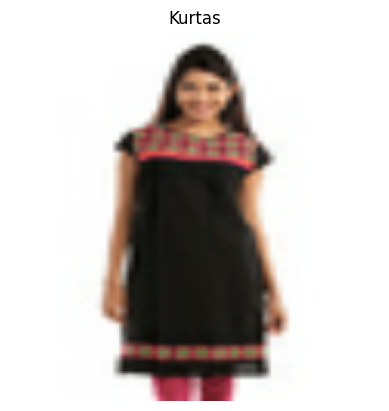

In [ ]:
# let's visualize the image
import matplotlib.pyplot as plt
plt.imshow(images[0]/255.)
plt.title(class_names[labels.numpy().argmax()])
plt.axis(False)

## Setting up mixed precision

In [ ]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")

##

## Create modelling callbacks

In [ ]:
checkpoint_path = "model_checkpoint/cp.cpkt.weights.h5"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                      monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=0)


In [ ]:
# import helper functions
import os
import pathlib
if not os.path.exists("helper_functions.py"):
  !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
else:
  print("The helper_functions.py already exists skipping download...")

--2025-11-11 13:06:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-11-11 13:06:07 (135 MB/s) - ‘helper_functions.py’ saved [10246/10246]



##Build feature extraction model using EfficientNetV2B0

Callbacks: ready to roll.

Mixed precision: turned on.

Let's build a model.

Because our dataset is quite large, we're going to move towards fine-tuning an existing pretrained model (EfficienetNetV20).

But before we get into fine-tuning, let's set up a feature-extraction model.

Recall, the typical order for using transfer learning is:

1. Build a feature extraction model (replace the top few layers of a pretrained model)
2. Train for a few epochs with lower layers frozen
3. Fine-tune if necessary with multiple layers unfrozen

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3), name="Input_layer"),
    tf.keras.layers.RandomFlip("Horizontal"),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomZoom(0.2)
], name="data_augmentation_layer")

In [ ]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape=(224,224,3), name="Input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="Pooling_layer")(x)
x = tf.keras.layers.Dense(len(class_names), name="Output_layer")(x)
output = tf.keras.layers.Activation("softmax", dtype=tf.float32, name="mixed_float32")(x)
model = tf.keras.Model(inputs,output)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation_layer         │ (None, None, None, 3)  │             0 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, None, None,     │     5,919,312 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pooling_layer                   │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 143)            │       183,183 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mixed_float32 (Activation)      │ (None, 143)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,102,495 (23.28 MB)

 Trainable params: 183,183 (715.56 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

In [ ]:
len(train_data),len(test_data)

(1113, 276)

In [ ]:
from helper_functions import create_tensorboard_callback

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True,
    verbose=1
)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=3,
    verbose=1
)

In [ ]:
history_1 = model.fit(train_data,
                      epochs=10,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=int(0.15*len(test_data)),
                      callbacks=[create_tensorboard_callback("training_logs","Fashion_styles_pred"), model_checkpoint, early_stop, reduce_lr]
                      )


Saving TensorBoard log files to: training_logs/Fashion_styles_pred/20251111-130804
Epoch 1/10
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 662s 573ms/step - accuracy: 0.2911 - loss: 3.3309 - val_accuracy: 0.6593 - val_loss: 1.4629 - learning_rate: 1.0000e-04
Epoch 2/10
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 201s 181ms/step - accuracy: 0.6279 - loss: 1.5850 - val_accuracy: 0.7431 - val_loss: 0.9510 - learning_rate: 1.0000e-04
Epoch 3/10
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 165s 148ms/step - accuracy: 0.6830 - loss: 1.2601 - val_accuracy: 0.7485 - val_loss: 0.8008 - learning_rate: 1.0000e-04
Epoch 4/10
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 147s 132ms/step - accuracy: 0.7086 - loss: 1.1003 - val_accuracy: 0.7622 - val_loss: 0.7018 - learning_rate: 1.0000e-04
Epoch 5/10
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 127s 114ms/step - accuracy: 0.7274 - loss: 1.0075 - val_accuracy: 0.7614 - val_loss: 0.6802 - learning_rate: 1.0000e-04
Epoch 6/10
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 122s 110ms/step - accuracy: 0.7398 - loss: 0.9364 - val_accuracy:

In [ ]:
for layer in base_model.layers[-100:]:
  layer.trainable=True

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              metrics=["accuracy"])

In [ ]:
history_2 = model.fit(train_data,
                      epochs=20,
                      validation_data=test_data,
                      validation_steps=int(0.15*len(test_data)),
                      initial_epoch=history_1.epoch[-1],
                      callbacks=[early_stop, reduce_lr]
                      )

Epoch 10/20
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 235s 182ms/step - accuracy: 0.7463 - loss: 1.0568 - val_accuracy: 0.8232 - val_loss: 0.5616 - learning_rate: 1.0000e-05
Epoch 11/20
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 144s 129ms/step - accuracy: 0.7737 - loss: 0.7670 - val_accuracy: 0.8171 - val_loss: 0.5386 - learning_rate: 1.0000e-05
Epoch 12/20
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 141s 127ms/step - accuracy: 0.7943 - loss: 0.6926 - val_accuracy: 0.8247 - val_loss: 0.5178 - learning_rate: 1.0000e-05
Epoch 13/20
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 138s 124ms/step - accuracy: 0.8040 - loss: 0.6497 - val_accuracy: 0.8239 - val_loss: 0.5058 - learning_rate: 1.0000e-05
Epoch 14/20
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 135s 121ms/step - accuracy: 0.8090 - loss: 0.6266 - val_accuracy: 0.8110 - val_loss: 0.5184 - learning_rate: 1.0000e-05
Epoch 15/20
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 144s 129ms/step - accuracy: 0.8176 - loss: 0.5992 - val_accuracy: 0.8262 - val_loss: 0.4831 - learning_rate: 1.0000e-05
Epoch 16/20
1113/1113 

In [ ]:
model.evaluate(test_data)

276/276 ━━━━━━━━━━━━━━━━━━━━ 23s 83ms/step - accuracy: 0.8443 - loss: 0.5011


[0.4729912579059601, 0.8542776107788086]

## Comparing model accuracy before and after Fine tuning

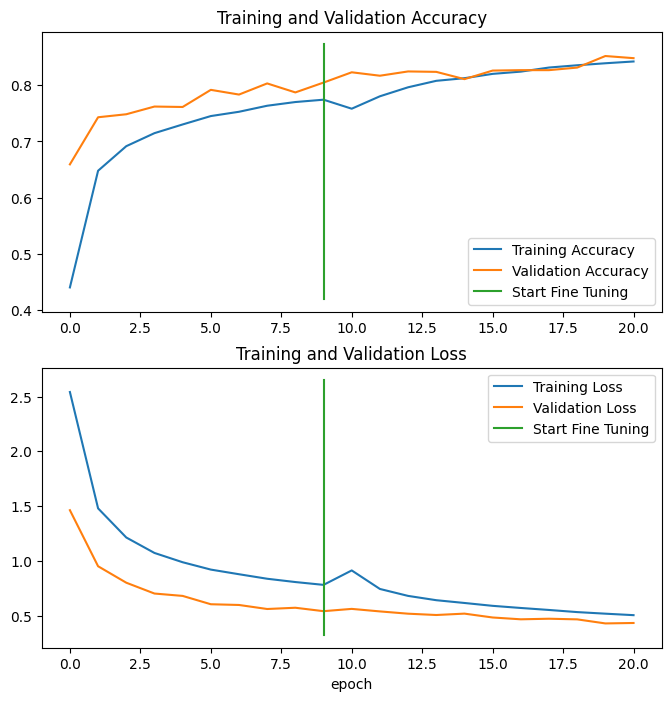

In [ ]:
from helper_functions import compare_historys
compare_historys(original_history=history_1,
                 new_history=history_2,
                 initial_epochs=10)

## Prediction

In [ ]:
# Make predictions with model
pred_probs = model.predict(test_data, verbose=1)

276/276 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step


In [ ]:
# What's the shape of our predictions?
pred_probs.shape

(8825, 143)

In [ ]:
# Get the class predicitons of each label
pred_classes = pred_probs.argmax(axis=1)

# How do they look?
pred_classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


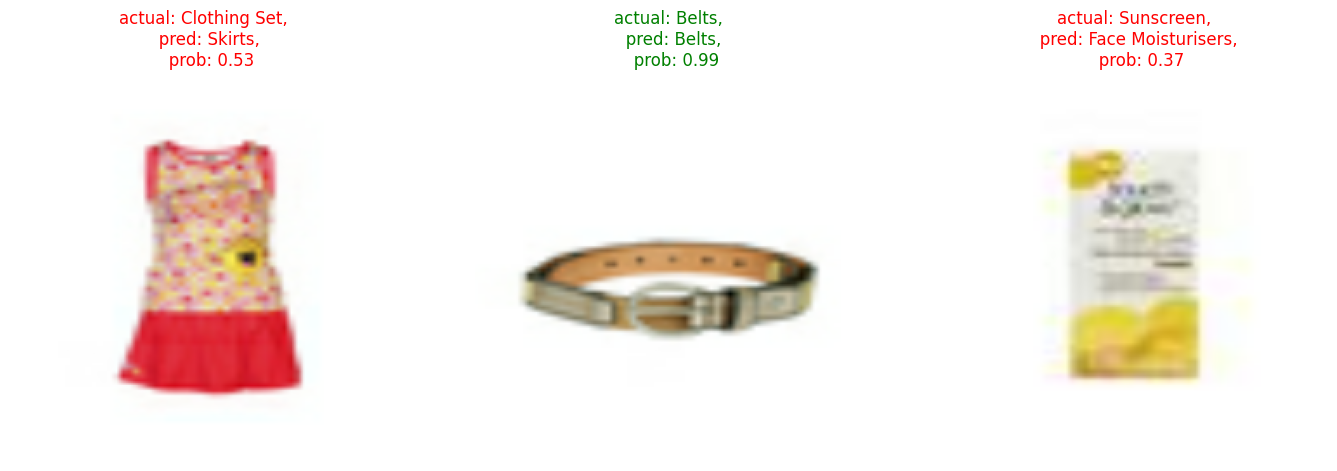

In [ ]:
# Make preds on a series of random images
import os
import random

plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(os.path.join(test_dir, class_name)))
  filepath = os.path.join(test_dir, class_name, filename)

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"""actual: {class_name},
   pred: {pred_class},
   prob: {pred_prob.max():.2f}""", c=title_color)
  plt.axis(False);

In [ ]:
from helper_functions import pred_and_plot

In [ ]:
y_labels = []
for image,labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())
y_labels[:10]

[np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0)]

## Accuracy, Precision, F1-score

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
calculate_results(y_true=y_labels,
          y_pred=pred_classes)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 85.42776203966007,
 'precision': 0.8396946205905319,
 'recall': 0.8542776203966006,
 'f1': 0.8423007945968366}

In [ ]:
# !zip -r dataset.zip /content/train_data /content/test_data

#Save model

In [ ]:

save_dir = "drive/MyDrive/Projects/"
model_name = "Fashion_predict_feature_extraction_model.keras"
save_path = os.path.join(save_dir, model_name)


os.makedirs(save_dir, exist_ok=True)

model.save(save_path)

In [ ]:
import json

class_names = train_data.class_names  # or train_data.class_indices.keys()

with open("drive/MyDrive/Projects/class_names.json", "w") as f:
    json.dump(class_names, f)


In [ ]:
# import json

# with open("drive/MyDrive/Projects/class_names.json", "r") as f:
#     class_names = json.load(f)

# print(class_names)


#Deploying our model

In [ ]:
import gradio as gr
import numpy as np
from PIL import Image
import tensorflow as tf

# 1) Load model
MODEL_PATH = "Fashion_predict_feature_extraction_model.keras"
model = tf.keras.models.load_model(MODEL_PATH)

# TODO: set your classes in the training order
CLASS_NAMES = class_names # <-- replace

IMG_SIZE = (224, 224)

def preprocess(img: Image.Image):
    img = img.convert("RGB").resize(IMG_SIZE)
    arr = np.array(img).astype("float32")
    return np.expand_dims(arr, 0)

def predict(image: Image.Image):
    x = preprocess(image)
    probs = model.predict(x)[0].tolist()
    return {cls: float(p) for cls, p in zip(CLASS_NAMES, probs)}

demo = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil", label="Upload product image"),
    outputs=gr.Label(num_top_classes=3),
    title="Fashion Style Predictor",
    description="Upload an image to get top-3 predicted styles."
)

if __name__ == "__main__":
    demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5835bd1ebf12b32d28.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
